## Observations and Insights 

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')
# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [104]:
# Checking the number of mice.
num_mice = study_data["Mouse ID"].nunique()
num_mice

249

In [105]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = study_data.loc[study_data.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [106]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = pd.DataFrame(duplicate)
duplicate_mouse

,0
0,g989


In [107]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice = study_data[study_data.isin(duplicate) == False]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [108]:
# Checking the number of mice in the clean DataFrame.
number_mice = duplicate_mice.count()["Mouse ID"]
number_mice

1880

## Summary Statistics

In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = duplicate_mice.groupby(["Drug Regimen"])
mean_drug = drug_regimen.mean()["Tumor Volume (mm3)"]
median_drug = drug_regimen.median()["Tumor Volume (mm3)"]
var_drug = drug_regimen.var()["Tumor Volume (mm3)"]
stddev_drug = drug_regimen.std()["Tumor Volume (mm3)"]
sem_drug = drug_regimen.sem()["Tumor Volume (mm3)"]
summary_statistics1 = pd.DataFrame({"Mean": mean_drug, "Median": var_drug, "Variance": var_drug, 
                                    "STD": stddev_drug, "SEM": sem_drug})
summary_statistics1
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,61.168083,7.821003,0.581331
Propriva,52.322552,42.351070,42.351070,6.507770,0.512884
Ramicane,40.216745,23.486704,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,59.450562,7.710419,0.573111


In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics2 = duplicate_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 
                                                                                          'median', 'var', 'std', 'sem'])
summary_statistics2 
# This method produces everything in a single groupby function

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

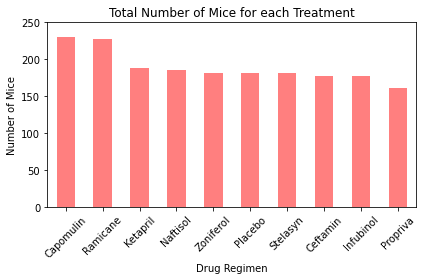

In [111]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_count = duplicate_mice["Drug Regimen"].value_counts()
drugs = duplicate_mice["Drug Regimen"].unique()
drug_count.plot(kind='bar', facecolor='r', alpha=0.5)
plt.title("Total Number of Mice for each Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.xlim(-0.5, len(drugs) -0.5)
plt.ylim(0, 250)
plt.tight_layout()

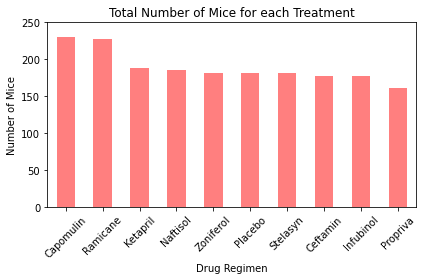

In [112]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
list_drugs = duplicate_mice["Drug Regimen"]
drugs = list_drugs.unique()
mice_count = list_drugs.value_counts()
mice_count
mice_count.plot.bar(mice_count, color='r', alpha=0.5, align='center')
plt.xticks(rotation=45)
plt.title("Total Number of Mice for each Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xlim(-0.5, len(drugs) -0.5)
plt.ylim(0, 250)
plt.tight_layout()
plt.show()

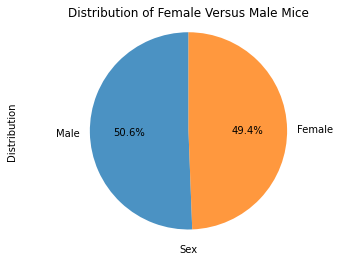

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = duplicate_mice["Sex"].value_counts()
gender_count.plot(kind='pie', title="Distribution of Female Versus Male Mice", autopct='%1.1f%%', 
                  startangle=90, wedgeprops={'alpha': 0.8})
plt.ylabel("Distribution")
plt.xlabel("Sex")
plt.axis('equal')

plt.show()

(-1.1027130801595115,
 1.105172849624489,
 -1.1045613723658971,
 1.1002172082078998)

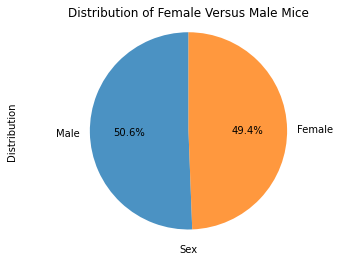

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = duplicate_mice["Sex"].value_counts()
gender_count
gender = duplicate_mice["Sex"].unique()
plt.pie(gender_count, labels=gender, autopct='%1.1f%%', startangle=90, wedgeprops={'alpha': 0.8})
plt.title("Distribution of Female Versus Male Mice")
plt.ylabel("Distribution")
plt.xlabel("Sex")
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_drugs = duplicate_mice.groupby(["Mouse ID"])["Timepoint"].max()
grouped_drugs

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint (left merge)
final_tumor = pd.DataFrame.merge(duplicate_mice, grouped_drugs, on='Mouse ID', how='left')
final_tumor.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0
...,...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0,45.0
96,u364,Capomulin,Male,18,17,5,45.760886,1,45.0
97,u364,Capomulin,Male,18,17,10,46.568417,2,45.0
98,u364,Capomulin,Male,18,17,15,47.212200,2,45.0


In [116]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in promising_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    output_volume = final_tumor.loc[final_tumor["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset 
    tumor_volume.append(output_volume)
    quartiles = output_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"The lower quartile of {treatment} is {lowerq}")
    print(f"The upper quartile of {treatment} is {upperq}")     
    print(f"The IQR of {treatment} is {iqr}")      
    
    # Determine outliers using upper and lower bounds
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq - (1.5*iqr)
    print(f"Values below {lowerbound} for {treatment} could be outliers.")
    print(f"Values above {upperbound} for {treatment} could be outliers.")     
    
    

The lower quartile of Capomulin is 37.685932865
The upper quartile of Capomulin is 45.0
The IQR of Capomulin is 7.314067135000002
Values below 26.714832162499995 for Capomulin could be outliers.
Values above 34.0288992975 for Capomulin could be outliers.
The lower quartile of Ramicane is 36.67463458499999
The upper quartile of Ramicane is 45.0
The IQR of Ramicane is 8.325365415000007
Values below 24.18658646249998 for Ramicane could be outliers.
Values above 32.51195187749999 for Ramicane could be outliers.
The lower quartile of Infubinol is 47.3123533
The upper quartile of Infubinol is 57.314443967500004
The IQR of Infubinol is 10.002090667500006
Values below 32.309217298749985 for Infubinol could be outliers.
Values above 42.31130796625 for Infubinol could be outliers.
The lower quartile of Ceftamin is 47.208427112500004
The upper quartile of Ceftamin is 56.801437570000004
The IQR of Ceftamin is 9.5930104575
Values below 32.818911426250004 for Ceftamin could be outliers.
Values above

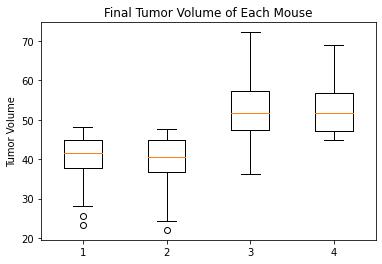

In [117]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_volume)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Time Point')

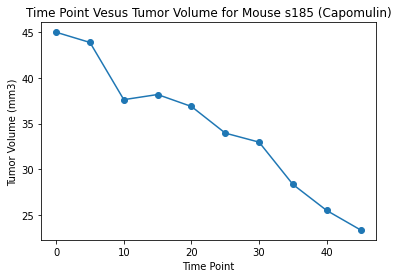

In [118]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = duplicate_mice.loc[duplicate_mice["Drug Regimen"] == "Capomulin", 
                               ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
mouse_s185 = capomulin.loc[capomulin["Mouse ID"] == "s185", ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"], marker='o')
plt.title("Time Point Vesus Tumor Volume for Mouse s185 (Capomulin)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time Point")

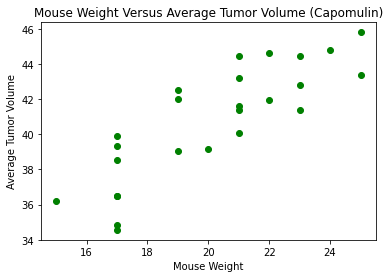

In [119]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice = duplicate_mice.loc[duplicate_mice["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_mice.groupby(["Mouse ID"]) 
mouse_weight = mouse_data.mean()["Weight (g)"]
average_tumor = mouse_data.mean()["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, average_tumor, color='green')
plt.title("Mouse Weight Versus Average Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

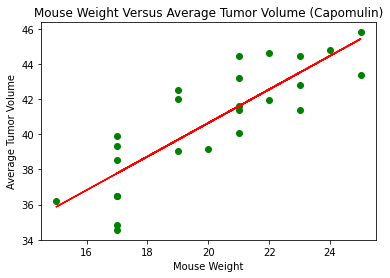

In [132]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(mouse_weight, average_tumor, color='green')
plt.title("Mouse Weight Versus Average Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor)
regress_value = mouse_weight * slope + intercept
plt.plot(mouse_weight, regress_value, 'r-')                   

In [134]:
line_eq = 'y =' + str(round(slope, 2) + 'x' + str(round(intercept, 2))
plt.annotate(line_eq, (6, 10), fontsize=15, color='r')  

SyntaxError: invalid syntax (<ipython-input-134-0d9455bec42c>, line 2)